In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_match_winners = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/Notebook/match_winner.csv')
df_match_winners

,Unnamed: 0,match_id,match_winner,player_id
0,0,12260075,away,254742.0
1,1,12260077,away,275923.0
2,2,12260084,away,254742.0
3,3,12261530,away,106755.0
4,4,12261532,away,106755.0
...,...,...,...,...
6550,3336,12384674,home,134342.0
6551,3337,12384788,home,386338.0
6552,3338,12384806,home,342835.0
6553,3339,12384975,home,96061.0


In [15]:
df_home_team_1 = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/202405/df_home_team_1.csv').drop_duplicates(subset='match_id').dropna(subset='weight')
df_away_team_1 = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/202405/df_away_team_1.csv').drop_duplicates(subset='match_id').dropna(subset='weight')
df_home_team_1

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
3,12305982,Schoolkate T.,schoolkate-tristan,M,947,Scarborough,Perth,1.83,78.0,right-handed,NaN,55333.0,255383.0,275471,187.0,SCH,Australia,"Schoolkate, Tristan"
9,12307358,Mena F.,mena-facundo,M,868,Argentina,"Buenos Aires, Argentina",1.83,85.0,right-handed,2009.0,9398.0,416685.0,38180,340.0,MEN,Argentina,"Mena, Facundo"
14,12306775,Agamenone F.,agamenone-franco,M,1906,"Lecce, Italy","Rio Cuarto, Argentina",1.91,82.0,right-handed,NaN,31597.0,442273.0,65606,234.0,AGA,Italy,"Agamenone, Franco"
26,12311715,Kym J.,kym-jerome,M,659,"Mohlin, Switzerland","Rheinfelden, Switzerland",1.98,87.0,right-handed,2019.0,5723.0,53702.0,309071,478.0,KYM,Switzerland,"Kym, Jerome"
31,12316335,Schmiedlová A.,schmiedlova-anna-karolina,F,2028,"Bratislava, Slovakia","Kosice, Slovakia",1.76,63.0,right-handed,2011.0,177428.0,3681968.0,46304,67.0,SCH,Slovakia,"Schmiedlova, Anna-Karolina"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12791,12293732,Jubb P.,jubb-paul,M,1212,United States,"York, England",1.80,69.0,right-handed,NaN,17308.0,279935.0,220537,323.0,JUB,United Kingdom,"Jubb, Paul"
12805,12260076,Sinner J.,sinner-jannik,M,99188,"Monte Carlo, Monaco","San Candido, Italy",1.88,68.0,right-handed,2018.0,3692708.0,17916067.0,206570,2.0,SIN,Italy,"Sinner, Jannik"
12807,12288933,Mayot H.,mayot-harold,M,1806,"Marly, France","Metz, France",1.78,78.0,right-handed,NaN,140448.0,500270.0,248846,121.0,MAY,France,"Mayot, Harold"
12809,12290721,Hsu Y.,hsu-yu-hsiou,M,920,Changhwa,"Yuanlin, Chinese Taipei",1.78,70.0,right-handed,NaN,36216.0,425433.0,204329,230.0,HSU,Chinese Taipei,"Hsu, Yu Hsiou"


In [16]:
#seprate away and home player to single dataframe for merge
df_match_winners_away = df_match_winners.loc[df_match_winners['match_winner'] == 'away',  ['match_id','match_winner']]
df_match_winners_home = df_match_winners.loc[df_match_winners['match_winner'] == 'home',  ['match_id','match_winner']]

#merge df to find player id winner for each match
df_match_winners_away_with_player_id = df_match_winners_away.merge(df_away_team_1[['player_id','weight', 'match_id']] , on='match_id', how='right')
df_match_winners_home_with_player_id = df_match_winners_home.merge(df_home_team_1[['player_id','weight', 'match_id']] , on='match_id', how='right')

#concate home and away dataframe winner
df_match_height = pd.concat([df_match_winners_away_with_player_id,df_match_winners_home_with_player_id] )

df_match_height

,match_id,match_winner,player_id,weight
0,12313689,NaN,79443,55.0
1,12311715,away,24412,80.0
2,12309627,NaN,210490,79.0
3,12312542,away,102339,83.0
4,12306801,NaN,100069,68.0
...,...,...,...,...
1654,12293732,home,220537,69.0
1655,12260076,home,206570,68.0
1656,12288933,NaN,248846,78.0
1657,12290721,home,204329,70.0


In [17]:
weight_means_of_all = df_match_height['weight'].mean()
weight_means_of_all

np.float64(74.96395846059866)

In [18]:
df_match_winners_with_player_weight = df_match_height.dropna(subset='match_winner')
df_match_winners_with_player_weight

,match_id,match_winner,player_id,weight
1,12311715,away,24412,80.0
3,12312542,away,102339,83.0
6,12313499,away,187219,80.0
7,12309630,away,38183,82.0
9,12313650,away,58703,82.0
...,...,...,...,...
1651,12293734,home,54387,77.0
1653,12291711,home,91960,55.0
1654,12293732,home,220537,69.0
1655,12260076,home,206570,68.0


In [19]:
df_match_winners_with_player_weight['%distance_to_mean'] = (df_match_winners_with_player_weight['weight']-weight_means_of_all)/weight_means_of_all*100
df_match_winners_with_player_weight['%distance_to_mean'] = df_match_winners_with_player_weight['%distance_to_mean'].astype(int)
df_match_winners_with_player_weight

/tmp/ipykernel_26003/3293092383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_winners_with_player_weight['%distance_to_mean'] = (df_match_winners_with_player_weight['weight']-weight_means_of_all)/weight_means_of_all*100
/tmp/ipykernel_26003/3293092383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_winners_with_player_weight['%distance_to_mean'] = df_match_winners_with_player_weight['%distance_to_mean'].astype(int)


,match_id,match_winner,player_id,weight,%distance_to_mean
1,12311715,away,24412,80.0,6
3,12312542,away,102339,83.0,10
6,12313499,away,187219,80.0,6
7,12309630,away,38183,82.0,9
9,12313650,away,58703,82.0,9
...,...,...,...,...,...
1651,12293734,home,54387,77.0,2
1653,12291711,home,91960,55.0,-26
1654,12293732,home,220537,69.0,-7
1655,12260076,home,206570,68.0,-9


In [20]:
df_compare = df_match_winners_with_player_weight.groupby('%distance_to_mean')['match_id'].count().reset_index()
df_compare = df_compare.rename(columns={'match_id':'number_of_match'})

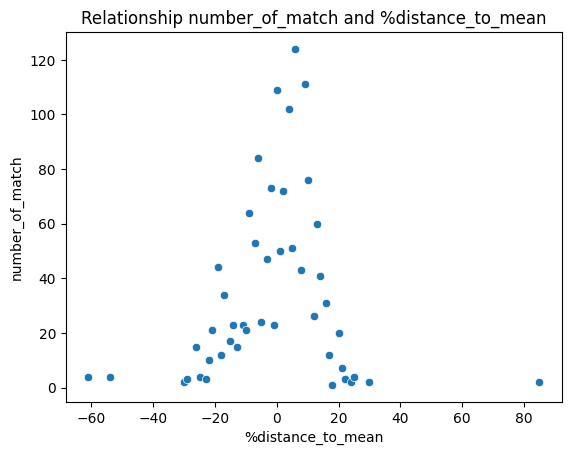

In [23]:
sns.scatterplot(y='number_of_match', x='%distance_to_mean', data=df_compare)
plt.title('Relationship number_of_match and %distance_to_mean')
plt.show()

In [27]:
higher_than_mean_chance =(len(df_match_winners_with_player_weight[df_match_winners_with_player_weight['%distance_to_mean'] > 0])/len(df_match_winners_with_player_weight))*100
higher_than_mean_chance

53.43511450381679

In [29]:
mean_chance = len(df_match_winners_with_player_weight[df_match_winners_with_player_weight['%distance_to_mean'] == 0])/len(df_match_winners_with_player_weight)*100
mean_chance

6.933842239185751

In [28]:
lower_than_mean_chance = (len(df_match_winners_with_player_weight[df_match_winners_with_player_weight['%distance_to_mean'] < 0])/len(df_match_winners_with_player_weight))*100
lower_than_mean_chance

39.63104325699746